In [7]:
# Gender,Age,Occupation,Student Status,Average Grade (Expect),Average ECTS (Expect),ECTS Summer,ECTS Winter,Grade Summer (AVG),Grade Winter (AVG)

# Install the wal module

import pandas as pd
import numpy as np
from pathlib import Path
import dfutil as dfutil

In [8]:
file_path = Path('data.csv')
if file_path.exists():
	df = pd.read_csv(file_path)
else:
	print(f"File {file_path} does not exist.")

#remove rows with missing values
df = dfutil.prepare_DF(df)

df



0.1999999999999995 3.4000000000000004
after removing grade summer outliers 53
0.5499999999999998 3.1900000000000004
after removing grade winter outliers 52
15.0 39.0
after removing ects summer outliers 43
15.0 39.0
after removing ects winter outliers 39


,Gender,Age,Occupation,Student Status,Average Grade (Expect),Average ECTS (Expect),ECTS Summer,ECTS Winter,Grade Summer (AVG),Grade Winter (AVG),Language
0,male,28,Student (with a job),currently studying (2nd semester or higher),slightly better in the winter semester,slightly higher in the winter semester,24.0,30.0,1.30,1.54,1
1,male,26,Student (with a job),currently studying (2nd semester or higher),slightly better in the winter semester,slightly higher in the winter semester,36.0,30.0,2.00,2.00,1
2,male,26,Student (with a job),currently studying (2nd semester or higher),the same,slightly higher in the summer semester,30.0,30.0,2.00,2.00,1
3,male,22,Student (with a job),currently studying (2nd semester or higher),the same,the same,25.0,30.0,2.08,2.57,1
4,male,28,Student (with a job),currently studying (2nd semester or higher),the same,the same,24.0,26.0,2.00,2.00,1
5,male,22,Student (with a job),currently studying (2nd semester or higher),the same,slightly higher in the summer semester,37.0,32.0,1.32,1.60,1
6,male,26,Student (with a job),currently studying (2nd semester or higher),slightly better in the winter semester,higher in the winter semester,27.0,15.0,2.74,1.00,1
7,male,27,full-time employee,previously studied,the same,the same,20.0,20.0,2.20,2.20,1
8,male,28,full-time employee,previously studied,slightly better in the winter semester,slightly higher in the winter semester,24.0,30.0,2.57,1.05,1
9,male,21,Student (with a job),currently studying (2nd semester or higher),slightly better in the summer semester,higher in the summer semester,36.0,20.0,1.30,2.00,1


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

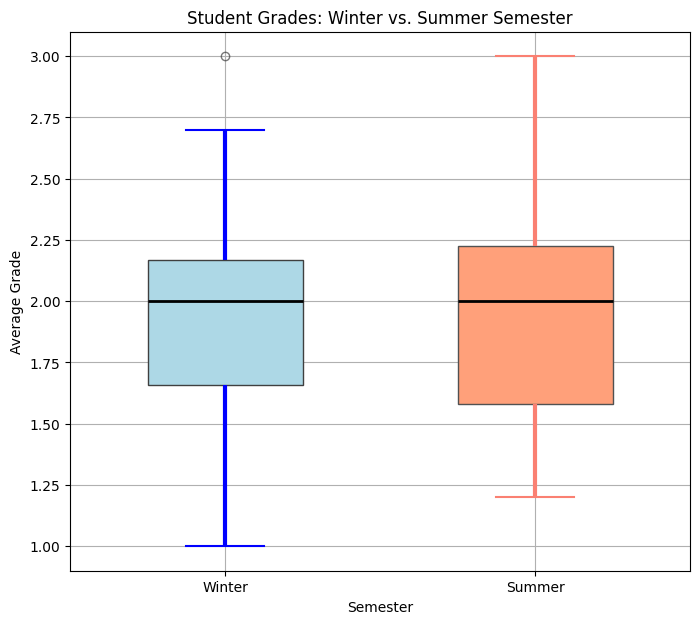

In [10]:
# ✅ Fix: Convert string numbers (with commas) to float
df["Grade Winter (AVG)"] = df["Grade Winter (AVG)"].astype(str).str.replace(",", ".").astype(float)
df["Grade Summer (AVG)"] = df["Grade Summer (AVG)"].astype(str).str.replace(",", ".").astype(float)

# Convert DataFrame to long format for boxplot
df_long = df.melt(value_vars=["Grade Winter (AVG)", "Grade Summer (AVG)"], 
                  var_name="Semester", value_name="Grade")

# Rename semester labels
df_long["Semester"] = df_long["Semester"].replace({"Grade Winter (AVG)": "Winter", 
                                                   "Grade Summer (AVG)": "Summer"})

plt.figure(figsize=(8, 7))  # Make the plot taller by increasing the height

# 🎯 1. Add Boxplot for Winter (Light Blue)
sns.boxplot(x="Semester", y="Grade", data=df_long[df_long["Semester"] == "Winter"], width=0.5, showfliers=True, 
            boxprops={'facecolor': 'lightblue'}, 
            whiskerprops={'color': 'blue', 'linewidth': 3},  # Thicker whisker lines
            capprops={'color': 'blue', 'linewidth': 1.5},
            flierprops={'marker': 'o', 'color': 'black', 'alpha': 0.7},
            medianprops={'color': 'black', 'linewidth': 2})

# 🎯 2. Add Boxplot for Summer (Light Orange)
sns.boxplot(x="Semester", y="Grade", data=df_long[df_long["Semester"] == "Summer"], width=0.5, showfliers=True, 
            boxprops={'facecolor': 'lightsalmon'},  # Light Orange (light salmon)
            whiskerprops={'color': 'salmon', 'linewidth': 3},  # Thicker whisker lines
            capprops={'color': 'salmon', 'linewidth': 1.5},
            flierprops={'marker': 'o', 'color': 'black', 'alpha': 0.7},
            medianprops={'color': 'black', 'linewidth': 2})

# 🔽 Invert Y-axis so lower grades (better) are at the top
plt.gca().invert_yaxis()

# Add padding to the x-axis (adjust space to the left and right)
plt.xlim(-0.5, 1.5)  # Padding on both sides

# Set explicit Y-axis limits to ensure data points above 1.5 and below 4 are included
plt.ylim(min(df[["Grade Winter (AVG)", "Grade Summer (AVG)"]].min()) - 0.1, 
         max(df[["Grade Winter (AVG)", "Grade Summer (AVG)"]].max()) + 0.1)

plt.xlabel("Semester")
plt.ylabel("Average Grade")
plt.title("Student Grades: Winter vs. Summer Semester")
plt.grid(True)

plt.show()


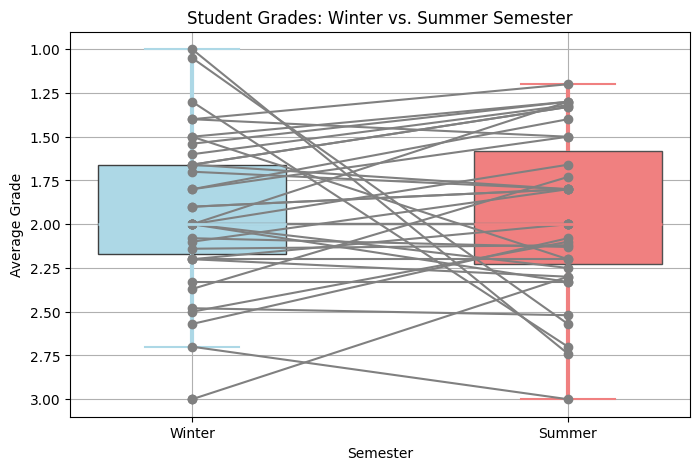

In [11]:
# ✅ Fix: Convert string numbers (with commas) to float
df["Grade Winter (AVG)"] = df["Grade Winter (AVG)"].astype(str).str.replace(",", ".").astype(float)
df["Grade Summer (AVG)"] = df["Grade Summer (AVG)"].astype(str).str.replace(",", ".").astype(float)

# Convert DataFrame to long format for boxplot
df_long = df.melt(value_vars=["Grade Winter (AVG)", "Grade Summer (AVG)"], 
                  var_name="Semester", value_name="Grade")

# Rename semester labels
df_long["Semester"] = df_long["Semester"].replace({"Grade Winter (AVG)": "Winter", 
                                                   "Grade Summer (AVG)": "Summer"})

plt.figure(figsize=(8, 5))

# 🎯 1. Add Boxplot for Winter (Light Blue) with all parts colored
sns.boxplot(x="Semester", y="Grade", data=df_long[df_long["Semester"] == "Winter"], width=0.5, showfliers=True, 
            boxprops={'facecolor': 'lightblue'}, 
            whiskerprops={'color': 'lightblue', 'linewidth': 3},  # Thicker whisker lines
            capprops={'color': 'lightblue', 'linewidth': 1.5},
            flierprops={'marker': 'o', 'color': 'black', 'alpha': 0.7},
            medianprops={'color': 'lightblue', 'linewidth': 2})

# 🎯 2. Add Boxplot for Summer (Light Red/Coral) with all parts colored
sns.boxplot(x="Semester", y="Grade", data=df_long[df_long["Semester"] == "Summer"], width=0.5, showfliers=True, 
            boxprops={'facecolor': 'lightcoral'}, 
            whiskerprops={'color': 'lightcoral', 'linewidth': 3},  # Thicker whisker lines
            capprops={'color': 'lightcoral', 'linewidth': 1.5},
            flierprops={'marker': 'o', 'color': 'black', 'alpha': 0.7},
            medianprops={'color': 'lightcoral', 'linewidth': 2})

# 🎯 3. Add Paired Line Plot (Shows individual changes) with lighter grey lines
for i in range(len(df)):
    plt.plot(["Winter", "Summer"], 
             [df.loc[i, "Grade Winter (AVG)"], df.loc[i, "Grade Summer (AVG)"]],
             marker="o", linestyle="-", alpha=1, color="grey")

# 🔽 Invert Y-axis so lower grades (better) are at the top
plt.gca().invert_yaxis()

plt.xlabel("Semester")
plt.ylabel("Average Grade")
plt.title("Student Grades: Winter vs. Summer Semester")
plt.grid(True)

plt.show()


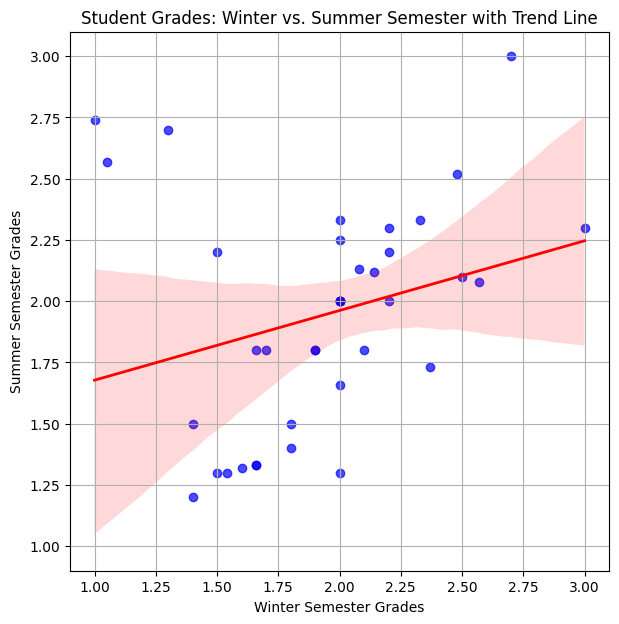

In [16]:
# ✅ Fix: Convert string numbers (with commas) to float
df["Grade Winter (AVG)"] = df["Grade Winter (AVG)"].astype(str).str.replace(",", ".").astype(float)
df["Grade Summer (AVG)"] = df["Grade Summer (AVG)"].astype(str).str.replace(",", ".").astype(float)

# Create a scatter plot with a trend line
plt.figure(figsize=(8, 7))

# Plot the scatter points
plt.scatter(df["Grade Winter (AVG)"], df["Grade Summer (AVG)"], color="blue", alpha=0.7)

# Add the trend line using seaborn's regplot
sns.regplot(x="Grade Winter (AVG)", y="Grade Summer (AVG)", data=df, scatter=False, color="red", line_kws={"linewidth": 2})

# Set the same range for both axes (based on min and max values of both axes)
min_value = min(df["Grade Winter (AVG)"].min(), df["Grade Summer (AVG)"].min())
max_value = max(df["Grade Winter (AVG)"].max(), df["Grade Summer (AVG)"].max())

# Set the same limits for both axes
plt.xlim(0.9, 3.1)  # Add padding for better visualization
plt.ylim(0.9, 3.1)

# Ensure equal aspect ratio for both axes
plt.gca().set_aspect('equal', adjustable='box')

# Add labels and title
plt.xlabel("Winter Semester Grades")
plt.ylabel("Summer Semester Grades")
plt.title("Student Grades: Winter vs. Summer Semester with Trend Line")
plt.grid(True)

# Show plot
plt.show()
